In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Vidualization
import os

# Dataset 1

(2000, 2)
(2000,)


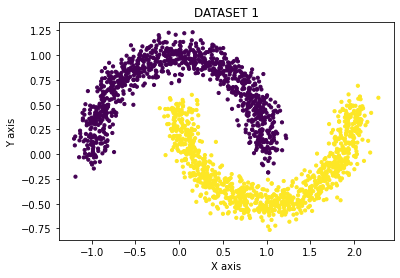

In [20]:
from sklearn import cluster, datasets, mixture
X1,Y1 = datasets.make_moons(n_samples=2000, noise=.09,random_state=10)
print(X1.shape)
print(Y1.shape)
plt.scatter(X1[:, 0], X1[:, 1], s=10, c=Y1)
plt.title('DATASET 1')
plt.xlabel('X axis')
plt.ylabel('Y axis')

plt.show()

### K-means Cluster

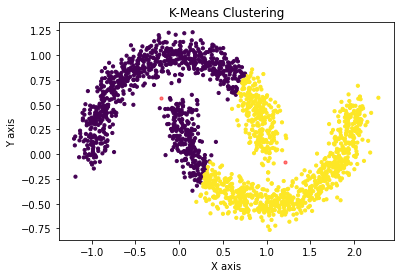

In [46]:
# implementing k-means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X1)
y_kmeans = kmeans.predict(X1)
plt.scatter(X1[:, 0], X1[:, 1], c=y_kmeans, s=10, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=10, alpha=0.5)
plt.title('K-Means Clustering')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()


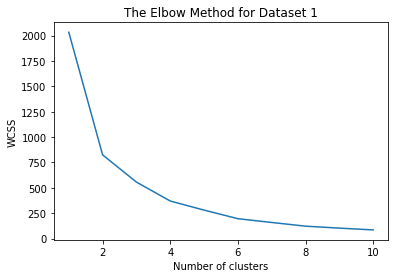

From the above graph we can see that the elbow occurs at x = 2. Hence, the optimum number of clusters for the dataset is 2.


In [21]:
# Find the optimum number of clusters for both datasets for K-Means, Hierarchical
#Clustering (single, complete, average) and BIRCH. [10]

# K-Means Clustering
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method for Dataset 1')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

print("From the above graph we can see that the elbow occurs at x = 2. Hence, the optimum number of clusters for the dataset is 2.")

### By hierarchial clustering (Agglomerative Clustering) Single Linkage

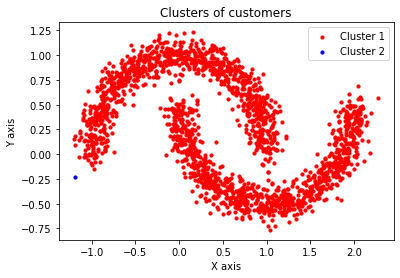

In [22]:
# Hierarchical Clustering
# Single Linkage
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='single') 
y_hc = hc.fit_predict(X1)
plt.scatter(X1[y_hc == 0, 0], X1[y_hc == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X1[y_hc == 1, 0], X1[y_hc == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.title('Clusters of customers')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
plt.show()


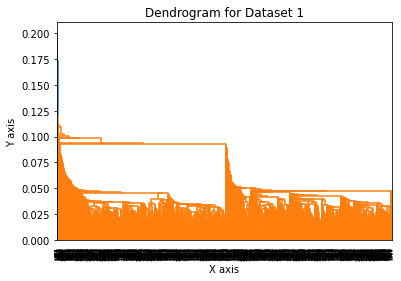

In [23]:
#make dendrogram for single linkage
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X1, method = 'single'))
plt.title('Dendrogram for Dataset 1')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

### Average Linkage

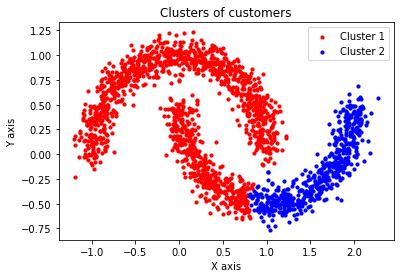

In [24]:
# Hierarchical Clustering
# Single Linkage
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='average') 
y_hc = hc.fit_predict(X1)
plt.scatter(X1[y_hc == 0, 0], X1[y_hc == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X1[y_hc == 1, 0], X1[y_hc == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.title('Clusters of customers')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
plt.show()

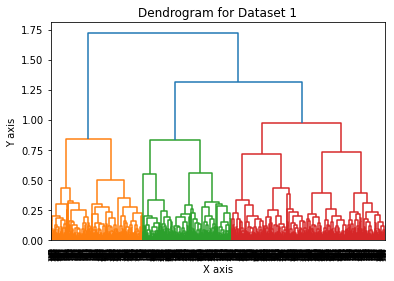

In [25]:
#make dendrogram for single linkage
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X1, method = 'average'))
plt.title('Dendrogram for Dataset 1')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

### Complete Linkage

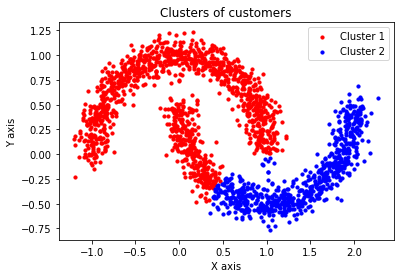

In [26]:
# Hierarchical Clustering
# Single Linkage
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='complete') 
y_hc = hc.fit_predict(X1)
plt.scatter(X1[y_hc == 0, 0], X1[y_hc == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X1[y_hc == 1, 0], X1[y_hc == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.title('Clusters of customers')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
plt.show()

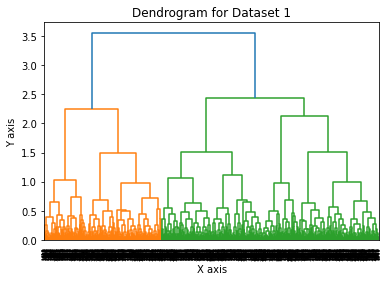

In [27]:
#make dendrogram for single linkage
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X1, method = 'complete'))
plt.title('Dendrogram for Dataset 1')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

### Birch

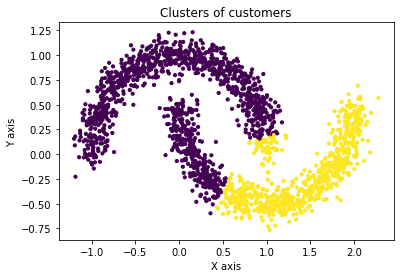

In [32]:
# BIRCH
from sklearn.cluster import Birch
brc = Birch(branching_factor=50, n_clusters=2, threshold=0.5,compute_labels=True)
brc.fit(X1)
labels = brc.predict(X1)
plt.scatter(X1[:, 0], X1[:, 1], c=labels, s=10, cmap='viridis')
plt.title('Clusters of customers')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

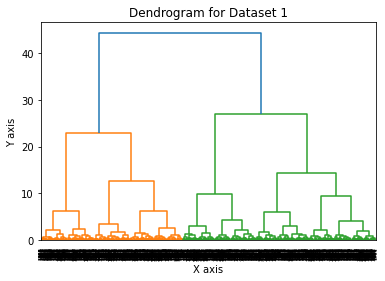

In [33]:
# make dendrogram for BIRCH
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X1, method = 'ward'))
plt.title('Dendrogram for Dataset 1') 
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

 ### DBSCAN


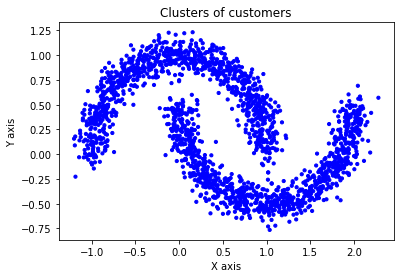

In [44]:
# DbScan for 2 clusters
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10) #min_samples = min number of points to form a cluster
dbscan.fit(X1)
labels = dbscan.labels_
plt.scatter(X1[:, 0], X1[:, 1], c=labels, s=10, cmap='brg')
plt.title('Clusters of customers') 
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

# K-medoids from scratch


In [41]:
# now we will implement K-medoids clustering from scratch
# we will use the dataset 1 for this
# we will use the euclidean distance as the distance metric
# we will use the k-medoids++ algorithm to initialize the medoids
# we will use the PAM algorithm to update the medoids
# we will use the silhouette score to find the optimum number of clusters

k = 2
max_iterations = 100

#initializing the centroids
centroids = X1[np.random.choice(X1.shape[0], k, replace=False)] #randomly selecting k points from the dataset
for i in range(max_iterations):
    # Compute the distance between each data point and each centroid
    distances = np.sqrt(((X1 - centroids[:, np.newaxis])**2).sum(axis=2)) # euclidean distance
    # Assign each data point to the closest centroid
    labels = np.argmin(distances, axis=0)

for j in range(k):
    centroids[j] = np.median(X1[labels == j], axis=0)
    
    
for i in range(max_iterations):
    old_labels = labels
    # Compute the distance between each data point and each centroid
    distances = np.sqrt(((X1 - centroids[:, np.newaxis])**2).sum(axis=2))
    # Assign each data point to the closest centroid
    labels = np.argmin(distances, axis=0)
    # Update the centroids to be the mean of all data points in the cluster
    for j in range(k):
        centroids[j] = np.median(X1[labels == j], axis=0)
    # Check if the clusters no longer change
    if np.all(old_labels == labels):
        break
    old_labels = labels

In [42]:
import plotly.express as px

# Plot the data and the centers generated as random
fig = px.scatter(x=X1[:,0], y=X1[:,1], color=labels)
fig.show()


# Comparison

As we have implemented all the algos for clustering , we will tell which algo is best for which dataset

Dataset 1 

The best Algorithm by looking at the visualizatin is K-mean Clustering and Birch 

The worst Algorithm by looking at the visualizatin is  DBscan and Hierarchical Clustering single linkage

# Dataset 2

(2000, 2)
(2000,)


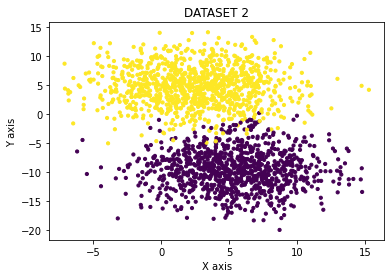

In [28]:
from sklearn.datasets import make_blobs
X3,Y3  = make_blobs(n_samples=2000,cluster_std=3.5,centers=2, n_features=2,random_state=10)
print(X3.shape)
print(Y3.shape)
plt.title('DATASET 2')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.scatter(X3[:, 0], X3[:, 1], s=10, c=Y3)
plt.show()

### K-means 

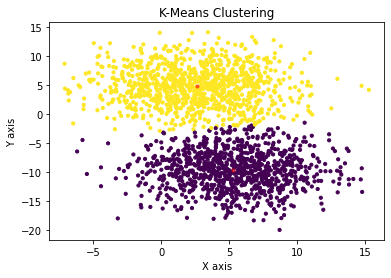

In [47]:
# implementing k-means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X3)
y_kmeans = kmeans.predict(X3)
plt.scatter(X3[:, 0], X3[:, 1], c=y_kmeans, s=10, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=10, alpha=0.5)
plt.title('K-Means Clustering')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

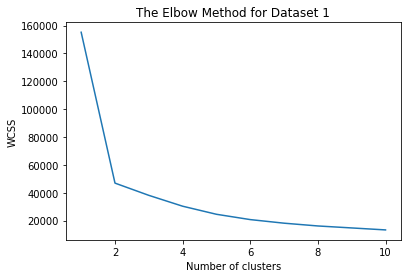

From the above graph we can see that the elbow occurs at x = 2. Hence, the optimum number of clusters for the dataset is 2.


In [48]:
# Find the optimum number of clusters for both datasets for K-Means, Hierarchical
#Clustering (single, complete, average) and BIRCH. [10]

# K-Means Clustering
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method for Dataset 1')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

print("From the above graph we can see that the elbow occurs at x = 2. Hence, the optimum number of clusters for the dataset is 2.")

### Hierarchical clustering

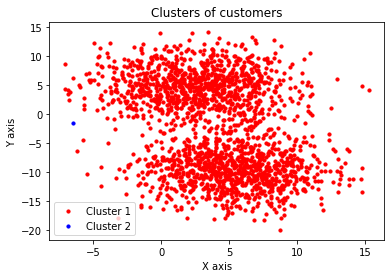

In [51]:
# Hierarchical Clustering
# Single Linkage
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='single') 
y_hc = hc.fit_predict(X3)
plt.scatter(X3[y_hc == 0, 0], X3[y_hc == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X3[y_hc == 1, 0], X3[y_hc == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.title('Clusters of customers')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
plt.show()

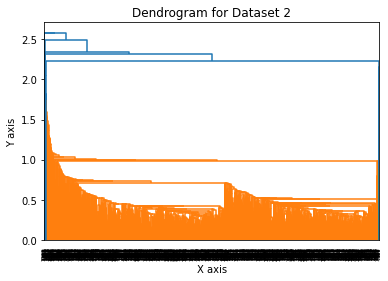

In [58]:
#make dendrogram for single linkage
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X3, method = 'single'))
plt.title('Dendrogram for Dataset 2')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

### Average Linkage

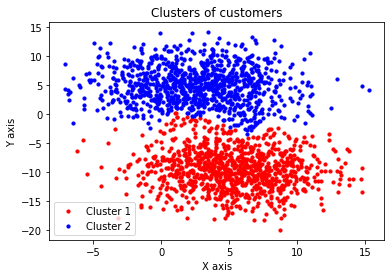

In [52]:
# Hierarchical Clustering
# Average Linkage
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='average') 
y_hc = hc.fit_predict(X3)
plt.scatter(X3[y_hc == 0, 0], X3[y_hc == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X3[y_hc == 1, 0], X3[y_hc == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.title('Clusters of customers')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
plt.show()

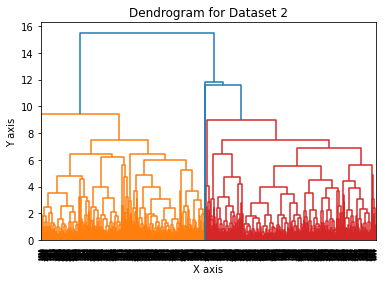

In [57]:
#make dendrogram for single linkage
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X3, method = 'average'))
plt.title('Dendrogram for Dataset 2')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

### Complete Linkage

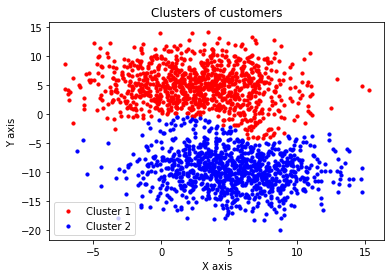

In [54]:
# Hierarchical Clustering
# Complete  Linkage
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='complete') 
y_hc = hc.fit_predict(X3)
plt.scatter(X3[y_hc == 0, 0], X3[y_hc == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X3[y_hc == 1, 0], X3[y_hc == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.title('Clusters of customers')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
plt.show()

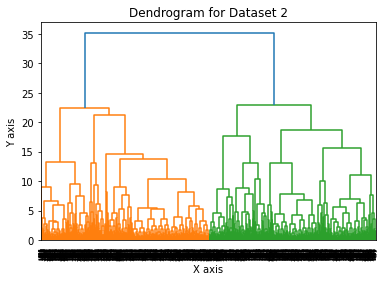

In [59]:
#make dendrogram for single linkage
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X3, method = 'complete'))
plt.title('Dendrogram for Dataset 2')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

### Birch

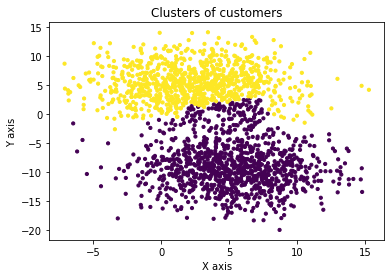

In [60]:
# BIRCH
from sklearn.cluster import Birch
brc = Birch(branching_factor=50, n_clusters=2, threshold=0.5,compute_labels=True)
brc.fit(X3)
labels = brc.predict(X3)
plt.scatter(X3[:, 0], X3[:, 1], c=labels, s=10, cmap='viridis')
plt.title('Clusters of customers')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

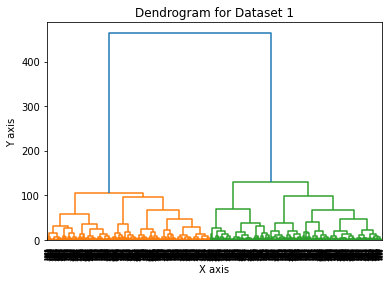

In [61]:
# make dendrogram for BIRCH
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X3, method = 'ward'))
plt.title('Dendrogram for Dataset 1') 
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

### DBSCAN

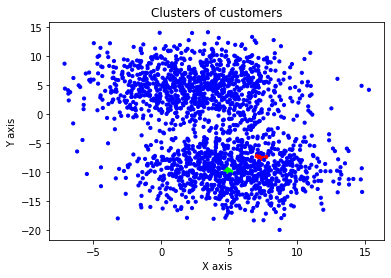

In [62]:
# DbScan for 2 clusters
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10) #min_samples = min number of points to form a cluster
dbscan.fit(X3)
labels = dbscan.labels_
plt.scatter(X3[:, 0], X3[:, 1], c=labels, s=10, cmap='brg')
plt.title('Clusters of customers') 
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

### K-medoid From Scratch

In [63]:
k = 2
max_iterations = 100

#initializing the centroids
centroids = X3[np.random.choice(X1.shape[0], k, replace=False)] #randomly selecting k points from the dataset
for i in range(max_iterations):
    # Compute the distance between each data point and each centroid
    distances = np.sqrt(((X3 - centroids[:, np.newaxis])**2).sum(axis=2)) # euclidean distance
    # Assign each data point to the closest centroid
    labels = np.argmin(distances, axis=0)

for j in range(k):
    centroids[j] = np.median(X3[labels == j], axis=0)
    
    
for i in range(max_iterations):
    old_labels = labels
    # Compute the distance between each data point and each centroid
    distances = np.sqrt(((X3 - centroids[:, np.newaxis])**2).sum(axis=2))
    # Assign each data point to the closest centroid
    labels = np.argmin(distances, axis=0)
    # Update the centroids to be the mean of all data points in the cluster
    for j in range(k):
        centroids[j] = np.median(X3[labels == j], axis=0)
    # Check if the clusters no longer change
    if np.all(old_labels == labels):
        break
    old_labels = labels

In [65]:
import plotly.express as px

# Plot the data and the centers generated as random
fig = px.scatter(x=X3[:,0], y=X3[:,1], color=labels)
fig.show()




As we have implemented all the algos for clustering , we will tell which algo is best for which dataset

Dataset 2

The best Algorithm by looking at the visualizatin is K-mean Clustering and Birch 

The worst Algorithm by looking at the visualizatin is  DBscan and Hierarchical Clustering single linkage